<a href="https://colab.research.google.com/github/Rodolphenkerbu/Wine_Clustering-/blob/main/Conceptual_1_Applied_9_questions_A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#==============================================================================
# Conceptual question #1
#==============================================================================
text= """
(a) Proof for Equation (12.18)

The K-Means objective function is given as:

J = ∑(k=1 to K) ∑(x ∈ C_k) ||x - μ_k||^2,

where:

•	x represents a data point,

•	C_k is the set of data points assigned to cluster k,

•	μ_k is the centroid of cluster k.

Expanding ||x - μ_k||^2 using the formula for squared Euclidean distance:


||x - μ_k||^2 = (x - μ_k)^T (x - μ_k).

Simplify this expression:

(x - μ_k)^T (x - μ_k) = x^T x - 2x^T μ_k + μ_k^T μ_k.

Substitute this back into the K-Means objective function J:

J = ∑(k=1 to K) ∑(x ∈ C_k) [x^T x - 2x^T μ_k + μ_k^T μ_k].

Now separate the terms:

1.	∑(k=1 to K) ∑(x ∈ C_k) x^T x: This term is independent of the centroids μ_k,
so it remains constant throughout the optimization process.

2.	-2 ∑(k=1 to K) ∑(x ∈ C_k) x^T μ_k: This term represents the interaction
between data points x and their assigned centroids μ_k.

3.	∑(k=1 to K) ∑(x ∈ C_k) μ_k^T μ_k: This term depends only on the centroids
μ_k. Thus, the expanded objective function becomes:
J = constant - 2 ∑(k=1 to K) ∑(x ∈ C_k) x^T μ_k + ∑(k=1 to K) ∑(x ∈ C_k) μ_k^T μ_k.
This expanded form aligns with the structure of equation (12.18), showing how
the objective function is a combination of terms involving the data points
and centroids."""

print(text)

# Separating the text explanation with additional new lines for clarity
print("\n" + "="*80 + "\n")  # Adds a separator line

text="""(b) Argue That K-Means Decreases (12.17): The K-Means algorithm decreases the
objective function at each iteration because its two steps—cluster assignment
and centroid update—work to minimize the sum of squared distances. Assigning
each point to the nearest centroid reduces the distance contribution for a fixed
set of centroids, while updating centroids to the mean of their assigned points
further minimizes within-cluster variation. This ensures the objective function
decreases or remains constant, converging to a local minimum.
"""

print(text)


(a) Proof for Equation (12.18)

The K-Means objective function is given as:

J = ∑(k=1 to K) ∑(x ∈ C_k) ||x - μ_k||^2,

where:

•	x represents a data point,

•	C_k is the set of data points assigned to cluster k,

•	μ_k is the centroid of cluster k.

Expanding ||x - μ_k||^2 using the formula for squared Euclidean distance:


||x - μ_k||^2 = (x - μ_k)^T (x - μ_k).

Simplify this expression:

(x - μ_k)^T (x - μ_k) = x^T x - 2x^T μ_k + μ_k^T μ_k.

Substitute this back into the K-Means objective function J:

J = ∑(k=1 to K) ∑(x ∈ C_k) [x^T x - 2x^T μ_k + μ_k^T μ_k].

Now separate the terms:

1.	∑(k=1 to K) ∑(x ∈ C_k) x^T x: This term is independent of the centroids μ_k, 
so it remains constant throughout the optimization process.

2.	-2 ∑(k=1 to K) ∑(x ∈ C_k) x^T μ_k: This term represents the interaction 
between data points x and their assigned centroids μ_k.

3.	∑(k=1 to K) ∑(x ∈ C_k) μ_k^T μ_k: This term depends only on the centroids
μ_k. Thus, the expanded objective function becomes:


In [21]:
# Importing required libraries
import numpy as np
from sklearn.cluster import KMeans
from sympy import symbols, Sum, simplify, IndexedBase
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# -------------------------
# Part 1: Symbolic Proof of K-Means Objective Decrease
# -------------------------

# Define variables
k, n, m = symbols('k n m')  # Cluster index, observation index, total observations
x = IndexedBase('x')  # Data points
mu = IndexedBase('mu')  # Centroids

# K-Means Objective Function (Sum of Squared Distances)
objective = Sum((x[n] - mu[k])**2, (n, 1, m))

# Expand and simplify the objective function
expanded_objective = simplify(objective)

# Output the symbolic expanded objective function
print("Expanded Objective Function (Symbolic Proof):")
print(expanded_objective)



Expanded Objective Function (Symbolic Proof):
mu[k]**2*Sum(1, (n, 1, m)) + Sum(-2*mu[k]*x[n] + x[n]**2, (n, 1, m))


In [22]:
import pandas as pd

# Load the dataset and set state names as the index
data = pd.read_csv('/content/sample_data/USArrests.csv', index_col=0)

# Check the first few rows
print(data.head())


# Display the cleaned data
print(data.info())



            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6
<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


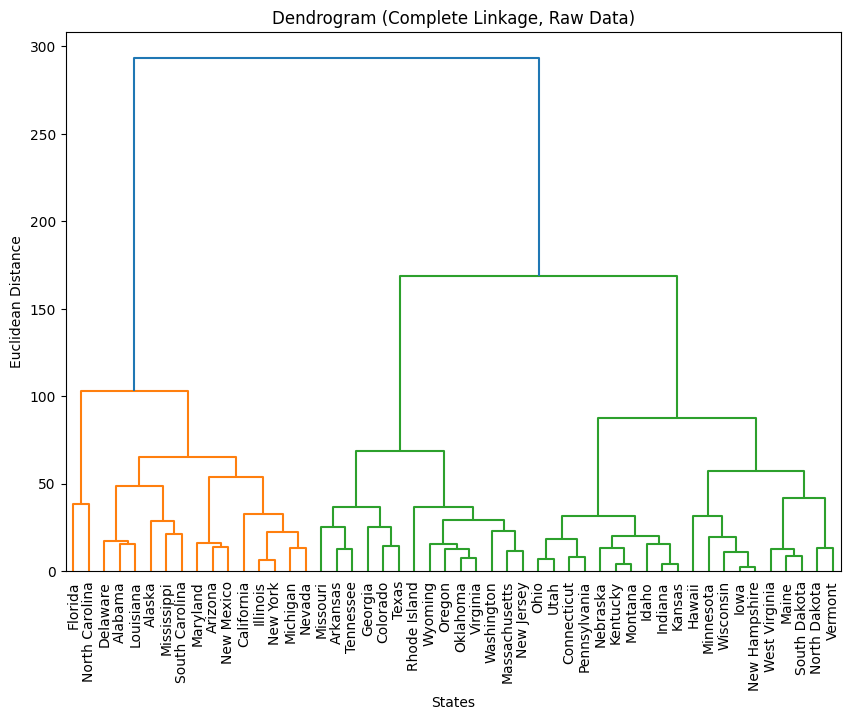

In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the USArrests dataset (available in R, converted to CSV for Python)
# Assuming the dataset is stored as "USArrests.csv"
# It contains columns: Murder, Assault, UrbanPop, Rape

# -------------------------
# Part (a): Hierarchical Clustering with Complete Linkage and Euclidean Distance
# -------------------------
# Perform hierarchical clustering
linkage_matrix = linkage(data, method="complete", metric="euclidean")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=data.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram (Complete Linkage, Raw Data)")
plt.xlabel("States")
plt.ylabel("Euclidean Distance")
plt.show()



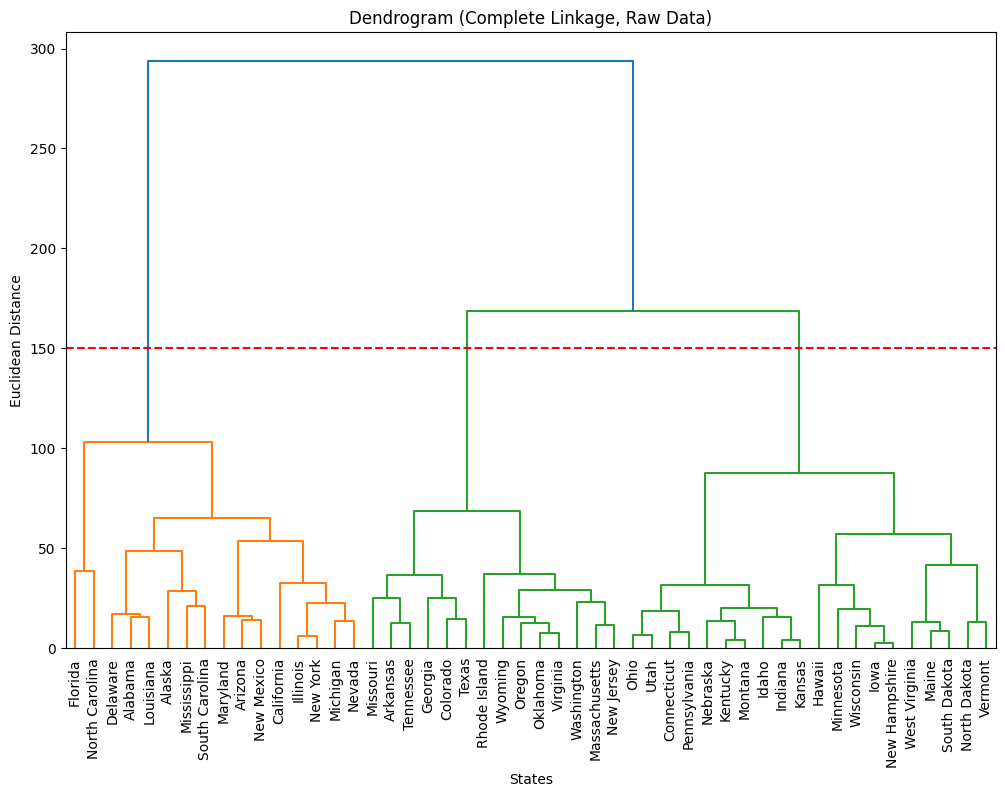


States in Each Cluster (Raw Data):
Cluster 1:
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']
Cluster 2:
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']
Cluster 3:
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


In [24]:
# -------------------------
# Part (b): Cut Dendrogram to Form Three Clusters
# -------------------------

#-------------------------
# Perform Hierarchical Clustering
# -------------------------
# Generate the linkage matrix for hierarchical clustering
linkage_matrix = linkage(data, method='complete', metric='euclidean')

# -------------------------
# Generate and Plot the Dendrogram
# -------------------------
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=data.index, leaf_rotation=90, leaf_font_size=10)

# Highlight the cutting height to form three clusters
cut_height = 150  # Adjust this value based on the visual inspection of the dendrogram
plt.axhline(y=cut_height, color='red', linestyle='--')

# Add plot title and labels
plt.title('Dendrogram (Complete Linkage, Raw Data)')
plt.xlabel('States')
plt.ylabel('Euclidean Distance')
plt.show()

# -------------------------
# Cutting the Dendrogram to Form Three Clusters
# -------------------------
# Cut the dendrogram to form exactly three clusters
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Add cluster labels to the dataset
data['Cluster_Raw'] = clusters

# Display states in each cluster
print("\nStates in Each Cluster (Raw Data):")
for cluster_id in range(1, 4):
    print(f"Cluster {cluster_id}:")
    print(data.index[data['Cluster_Raw'] == cluster_id].tolist())

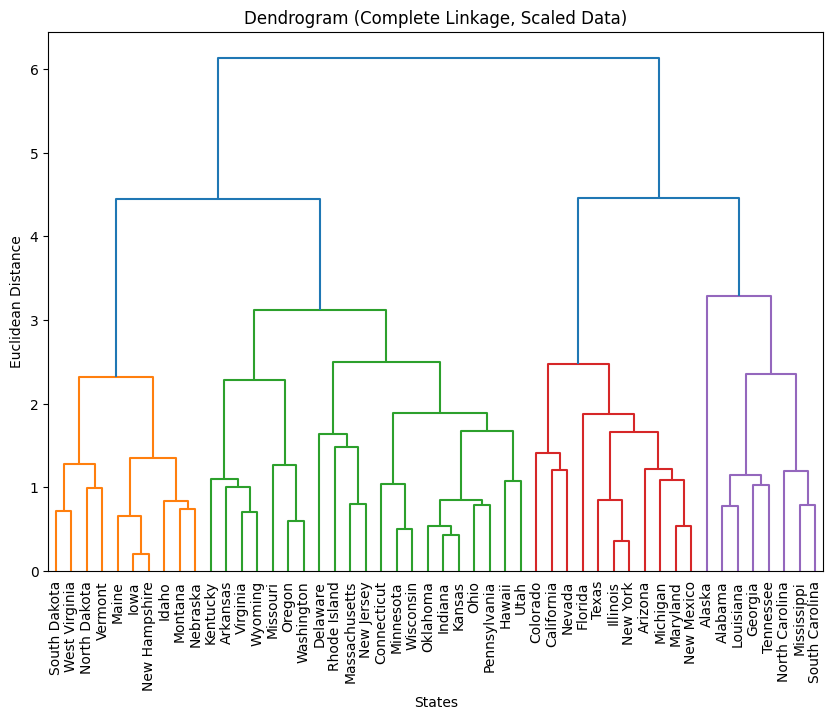


States in Each Cluster (Scaled Data):
Scaled Cluster 1:
['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
Scaled Cluster 2:
['Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas']
Scaled Cluster 3:
['Alabama', 'Alaska', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']


In [25]:
# -------------------------
# Part (c): Scaling the Variables and Re-Clustering
# -------------------------
# Scale the variables to have mean 0 and standard deviation 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])  # Exclude the 'Cluster' column

# Perform hierarchical clustering on scaled data
scaled_linkage_matrix = linkage(scaled_data, method='complete', metric='euclidean')

# Plot the dendrogram for scaled data
plt.figure(figsize=(10, 7))
dendrogram(scaled_linkage_matrix, labels=data.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram (Complete Linkage, Scaled Data)')
plt.xlabel('States')
plt.ylabel('Euclidean Distance')
plt.show()

# Cut the dendrogram for scaled data into three clusters
scaled_clusters = fcluster(scaled_linkage_matrix, t=3, criterion='maxclust')
data['Scaled_Cluster'] = scaled_clusters

# Display states in each cluster for scaled data
print("\nStates in Each Cluster (Scaled Data):")
for cluster_id in range(1, 4):
    print(f"Scaled Cluster {cluster_id}:")
    print(data.index[data['Scaled_Cluster'] == cluster_id].tolist())

In [26]:
# -------------------------
# Part (d): Analyze the Effect of Scaling
# -------------------------
text="""Scaling ensures that all variables contribute equally to the distance calculations
in hierarchical clustering, regardless of their original units or ranges. Without
scaling, variables with larger ranges, such as Assault rates in the USArrests
dataset, can dominate the Euclidean distance metric, leading to biased clusters.
Scaling standardizes all variables to have a mean of 0 and a standard deviation
of 1, ensuring that clusters are formed based on balanced contributions from all
variables. This results in more meaningful and equitable clustering, making
scaling an essential step in cases where variables are on different scales."""
print(text)

Scaling ensures that all variables contribute equally to the distance calculations 
in hierarchical clustering, regardless of their original units or ranges. Without 
scaling, variables with larger ranges, such as Assault rates in the USArrests 
dataset, can dominate the Euclidean distance metric, leading to biased clusters. 
Scaling standardizes all variables to have a mean of 0 and a standard deviation 
of 1, ensuring that clusters are formed based on balanced contributions from all 
variables. This results in more meaningful and equitable clustering, making 
scaling an essential step in cases where variables are on different scales.
